In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
dataset = pd.read_csv("dataset/car performance-dataset.csv")
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
dataset.sample(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
341,23.5,6,173.0,110,2725,12.6,81,1,chevrolet citation
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
53,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
357,32.9,4,119.0,100,2615,14.8,81,3,datsun 200sx
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
37,18.0,6,232.0,100,3288,15.5,71,1,amc matador


Here the target column is mpg (miles per galon)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


Dataset Variable Description

1. mpg          - continuous
2. cylinders    - discrete
3. displacement - continuous
4. horsepower   - continuous
5. weight       - continuous
6. acceleration - continuous
7. model year   - discrete
8. origin       - discrete
9. car name     - categorical 

In [5]:
dataset.shape

(398, 9)

In [6]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
dataset["car name"].nunique()

305

# Checking for null values

In [8]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

The car name column has the car name starting with the company name, so if we extract the company name out of it we can get more knowledge from the data.

In [9]:
dataset["car name"].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet impala       4
                      ..
toyota celica gt       1
plymouth grand fury    1
pontiac phoenix lj     1
audi 5000              1
mercury capri v6       1
Name: car name, Length: 305, dtype: int64

In [10]:
dataset["car name"] = [name.split()[0]  for name in dataset["car name"]]
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


# Exploratory Data Analysis (EDA)

<AxesSubplot:>

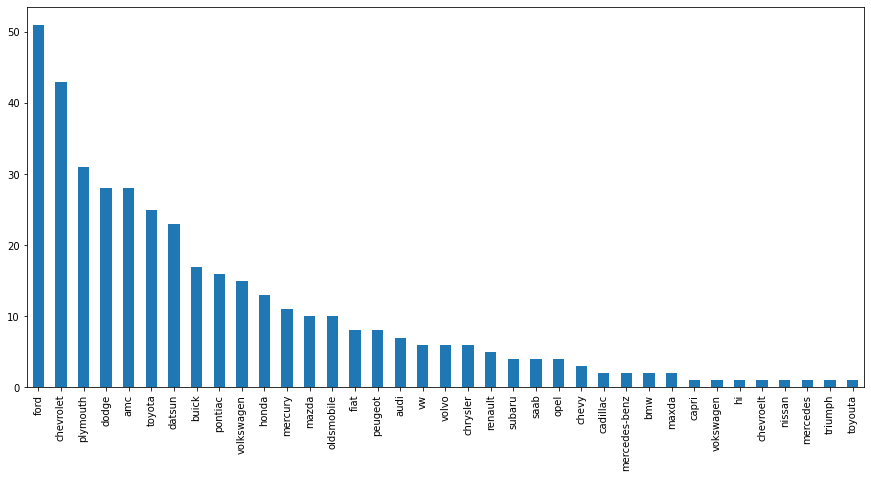

In [11]:
plt.figure(figsize = (15,7))
pd.value_counts(dataset["car name"]).plot.bar()

Most of the cars in the dataset belong to ford company

<AxesSubplot:xlabel='car name', ylabel='mpg'>

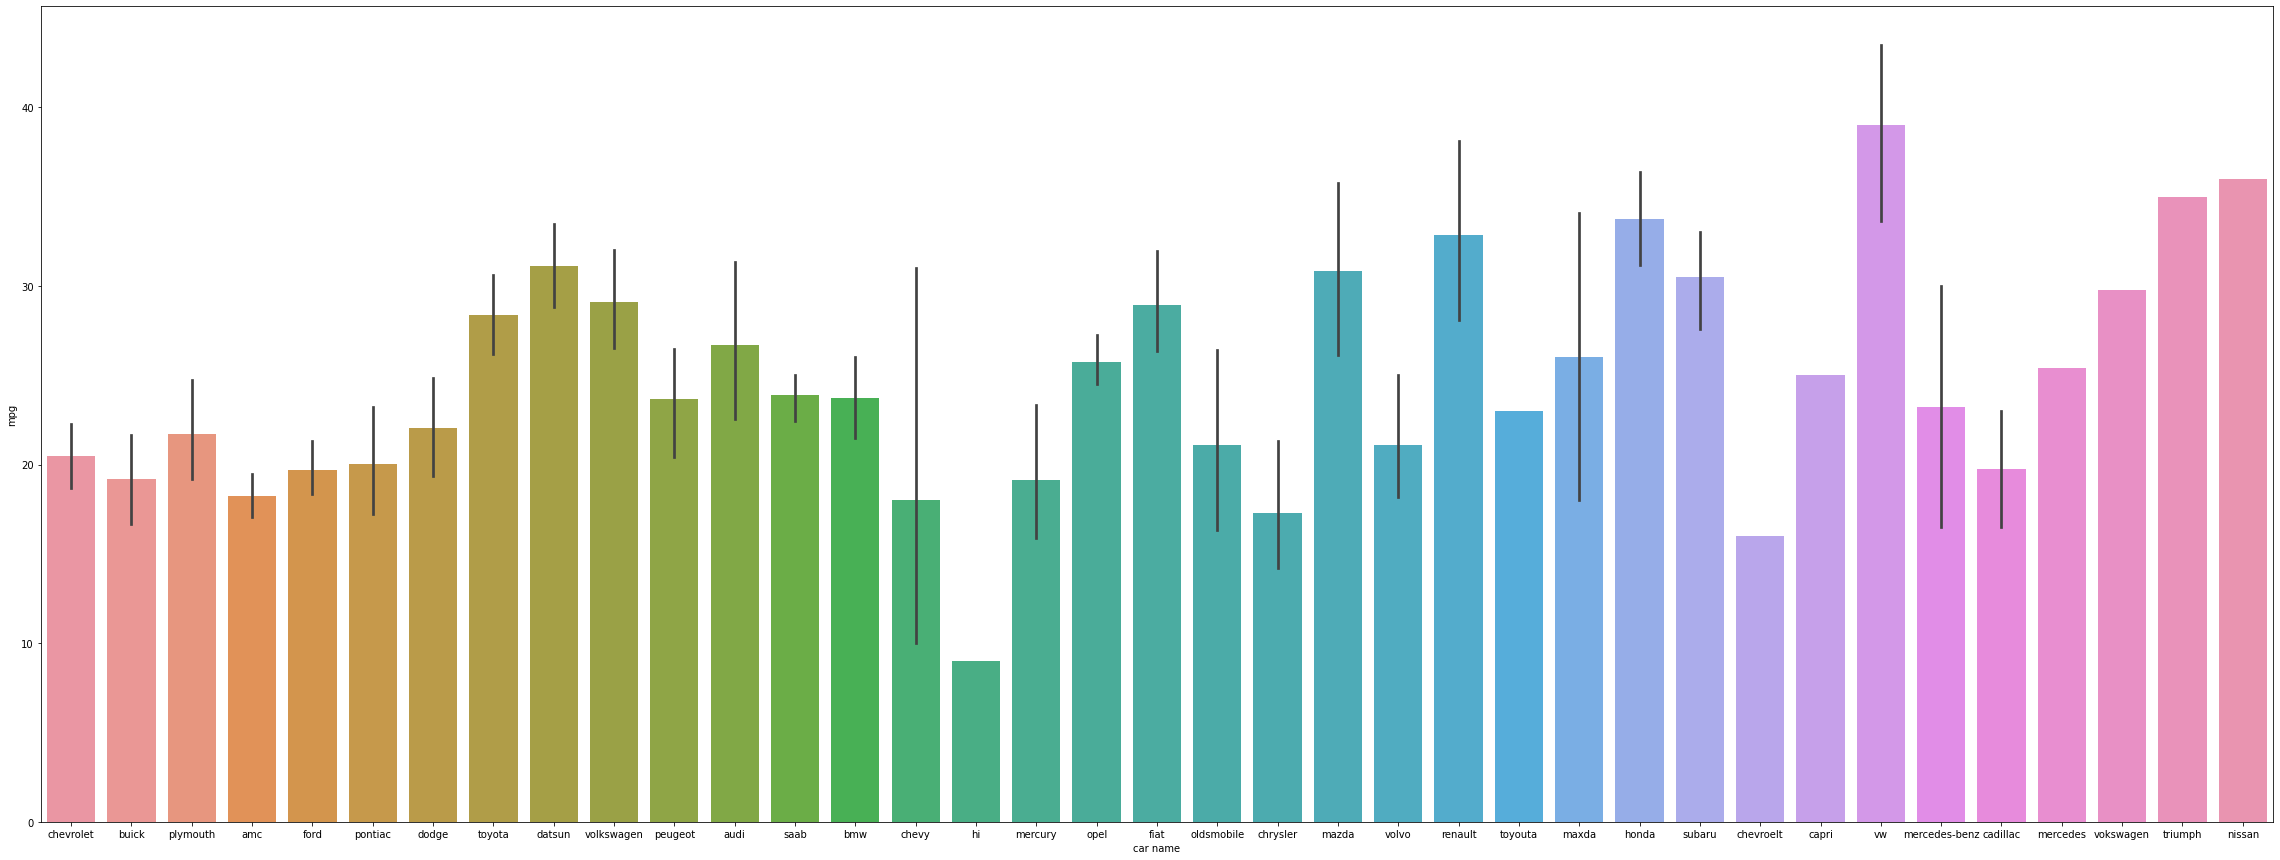

In [12]:
plt.figure(figsize = (40,15))
sns.barplot(x="car name",y="mpg",data=dataset)

And cars which belong to vw company have the best mpg values

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

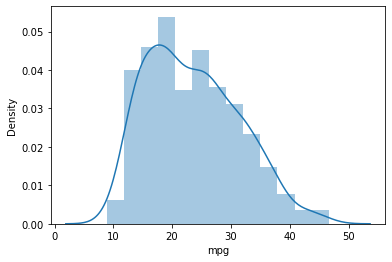

In [13]:
sns.distplot(dataset["mpg"]) 

As the histogram of mpg variable is left skewed, it means that the number of cars having low mpg is more than high mpg in the dataset

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

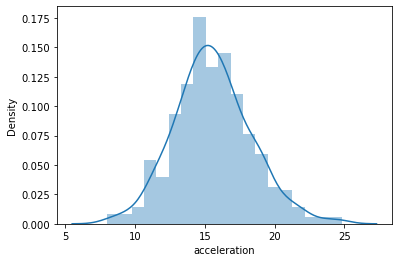

In [14]:
sns.distplot(dataset["acceleration"]) 

The distribution of acceleration follows normal distribution

<AxesSubplot:xlabel='model year', ylabel='mpg'>

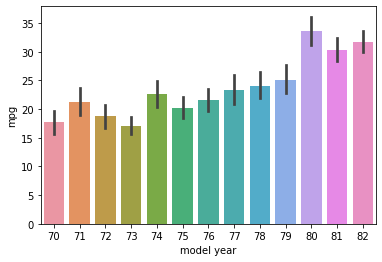

In [15]:
sns.barplot(x="model year",y="mpg",data=dataset)

In the above bar plot we can see that as the year went by the average mpg of the cars in the dataset improved, this shows that cars as become more efficient as time went by.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

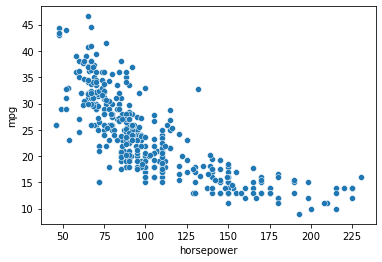

In [16]:
sns.scatterplot(x="horsepower",y="mpg",data=dataset)

The scatter plot above shows that cars with higher horsepower (sports cars) have low value of mpg 

<AxesSubplot:xlabel='weight', ylabel='mpg'>

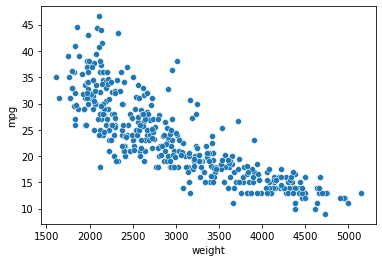

In [17]:
sns.scatterplot(x="weight",y="mpg",data=dataset)

Also as the weight of the car increases the miles per gallon (mpg) decreases

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

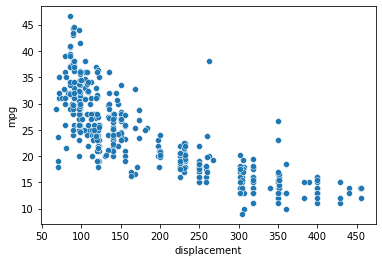

In [18]:
sns.scatterplot(x="displacement",y="mpg",data=dataset)

Also as the displacement of the car increases the miles per gallon (mpg) decreases

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cylinders', ylabel='Density'>

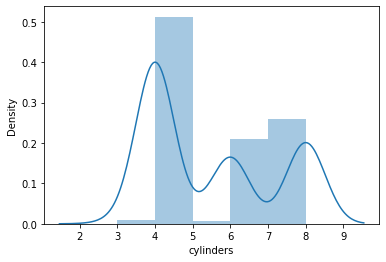

In [19]:
sns.distplot(dataset["cylinders"]) 

Most of cars in the dataset have 6 cylinders

<AxesSubplot:>

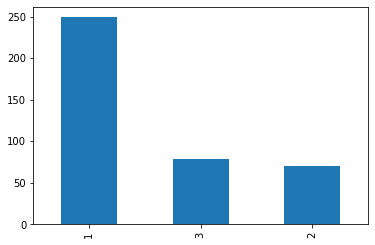

In [20]:
pd.value_counts(dataset["origin"]).plot.bar()

Most of cars in the dataset are originated from country assigned the value 1. So the model will predict more accurately for that country.

<AxesSubplot:>

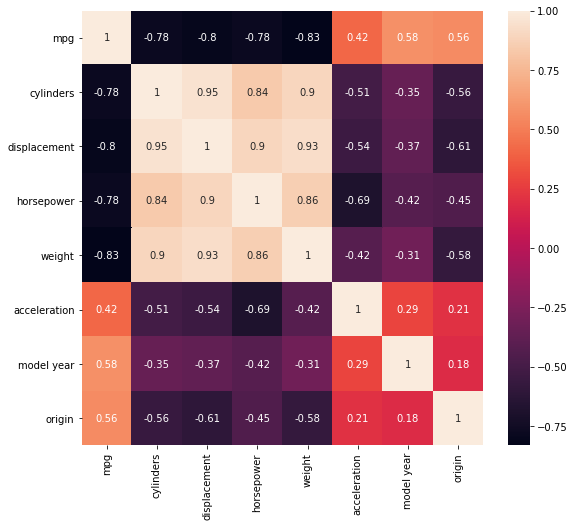

In [21]:
# checking correlation among independent variables
plt.figure(figsize = (9,8))
sns.heatmap(dataset.corr(),annot=True)

By looking at heatmap we can see that cylinders, displacement, horsepower and weight are negatively and strongly correlatrd to mpg.

The displacement, horsepower, weight,and cylinders have a strong positive correlations between themselves and this voilates the non-multicollinearity assumption of Linear regression. Multicollinearity interferes with the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.

# Feature Selection

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [23]:
x = dataset.drop(["mpg","car name"],axis=1)
x = sm.add_constant(x)
x.sample(4)

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin
311,1.0,4,98.0,70,2120,15.5,80,1
369,1.0,4,112.0,88,2395,18.0,82,1
365,1.0,6,200.0,88,3060,17.1,81,1
221,1.0,8,305.0,145,3880,12.5,77,1


In [24]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns

In [25]:
vif_data["values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_data

,Variable,values
0,const,764.948909
1,cylinders,10.704347
2,displacement,21.941912
3,horsepower,9.697609
4,weight,10.680202
5,acceleration,2.568888
6,model year,1.250699
7,origin,1.749349


Here there is a problem of multicollinearity in our data since some of the variables have a vif greater than 10. And we can also saw that the displacement,horsepower,weight,and cylinders have a strong positive correlations between themselves and they are the cause of the multicollinearity as shown in the correlation heatmap above. To avoid this, we take out the feature having highest vif from our data and compute the variance inflation factors of the remaining variables and check if multicollinearity still exists.

In [26]:
x1 = dataset.drop(["mpg","car name","displacement"],axis=1)
x1 = sm.add_constant(x1)
x1.sample(4)

,const,cylinders,horsepower,weight,acceleration,model year,origin
319,1.0,4,75,2542,17.5,80,3
351,1.0,4,65,2045,16.2,81,1
58,1.0,4,80,2126,17.0,72,1
8,1.0,8,225,4425,10.0,70,1


In [27]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["values"] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif_data

,Variable,values
0,const,760.738609
1,cylinders,5.937022
2,horsepower,8.864865
3,weight,9.018682
4,acceleration,2.539199
5,model year,1.245532
6,origin,1.576197


Now, we have gotten rid of the multicollinearity as the remaining variables have a variance inflation factor less than 10.

In [28]:
dataset.drop(["displacement"],axis=1,inplace=True)
dataset.sample(4)

,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
71,19.0,3,97,2330,13.5,72,3,mazda
340,25.8,4,92,2620,14.4,81,1,dodge
320,37.0,4,92,2434,15.0,80,3,datsun
105,13.0,8,170,4654,13.0,73,1,plymouth


# Encoding Categorical Variable

As the car name (or so to say company name) column has more than 15 unique category values so we can not use OneHotEncoding even though it is nominal variable, so we will use Label Encoding.

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
dataset["car name"] = le.fit_transform(dataset["car name"].values.reshape(-1,1))
dataset.head()

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,130,3504,12.0,70,1,7
1,15.0,8,165,3693,11.5,70,1,3
2,18.0,8,150,3436,11.0,70,1,25
3,16.0,8,150,3433,12.0,70,1,0
4,17.0,8,140,3449,10.5,70,1,13


In [31]:
import joblib

In [32]:
joblib.dump(le,"c_encoder.save")

['c_encoder.save']

# Seprating Independent and Dependent Variables

In [33]:
predictor = dataset.iloc[:,1:].values
predictor.shape

(398, 7)

In [34]:
target = dataset.iloc[:,0].values
target.shape

(398,)

# Min-Max Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms_predictor = ms.fit_transform(predictor)
ms_predictor

array([[1.        , 0.45652174, 0.5361497 , ..., 0.        , 0.        ,
        0.19444444],
       [1.        , 0.64673913, 0.58973632, ..., 0.        , 0.        ,
        0.08333333],
       [1.        , 0.56521739, 0.51686986, ..., 0.        , 0.        ,
        0.69444444],
       ...,
       [0.2       , 0.20652174, 0.19336547, ..., 1.        , 0.        ,
        0.30555556],
       [0.2       , 0.17934783, 0.2869294 , ..., 1.        , 0.        ,
        0.36111111],
       [0.2       , 0.19565217, 0.31386447, ..., 1.        , 0.        ,
        0.22222222]])

In [36]:
ms_predictor[0]

array([1.        , 0.45652174, 0.5361497 , 0.23809524, 0.        ,
       0.        , 0.19444444])

In [37]:
joblib.dump(ms,"scaler.save")

['scaler.save']

# Pricipal Component Analysis (PCA)

In [38]:
from sklearn.decomposition import PCA

In [39]:
ms_predictor.shape

(398, 7)

In [40]:
p = PCA()
p.fit(ms_predictor)

PCA()

In [41]:
reduced_predictor = p.transform(ms_predictor)
reduced_predictor

array([[ 0.74941655,  0.27083201, -0.23772838, ..., -0.02296859,
         0.20060865, -0.04163006],
       [ 0.85650728,  0.28654132, -0.23993729, ..., -0.08550077,
         0.08329525,  0.05057605],
       [ 0.67440421,  0.47295546,  0.03020007, ..., -0.12344762,
         0.18167829,  0.02795596],
       ...,
       [-0.15373242, -0.60107684,  0.0654013 , ..., -0.38135432,
         0.0228429 , -0.05657048],
       [-0.19883969, -0.64904271,  0.07377257, ...,  0.00820618,
        -0.09286963,  0.03553197],
       [-0.16009416, -0.69772956,  0.01091441, ...,  0.05536706,
        -0.12760591,  0.04928283]])

In [42]:
reduced_predictor.shape

(398, 7)

# Spliting the data into Train and Test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(ms_predictor,target,test_size=0.2,random_state=1)

In [45]:
x_train.shape

(318, 7)

In [46]:
x_test.shape

(80, 7)

In [47]:
y_train.shape

(318,)

In [48]:
y_test.shape

(80,)

# 1. Multi-Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = mlr.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
mlr_test = r2_score(y_test,y_pred)   # test data
mlr_test

0.8604155627874978

In [54]:
mlr_train = r2_score(y_train,mlr.predict(x_train))   # train data

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

7.864344006943559

# 2. Decision Tree

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [57]:
dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid={'max_leaf_nodes':np.arange(2,60),"criterion": ["mse", "friedman_mse", "mae", "poisson"],"random_state":[1]},scoring="r2",cv=5)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59]),
                         'random_state': [1]},
             scoring='r2')

In [58]:
dic = dt_grid.best_params_
dic

{'criterion': 'mae', 'max_leaf_nodes': 10, 'random_state': 1}

In [59]:
dt = dt_grid.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_leaf_nodes=10, random_state=1)

In [60]:
y_pred = dt.predict(x_test)

In [61]:
from sklearn.metrics import r2_score
dt_test = r2_score(y_test,y_pred)
dt_test  # test data

0.8112857119046509

In [62]:
dt_train = r2_score(y_train,dt.predict(x_train))  # train data
dt_train

0.8400677341007807

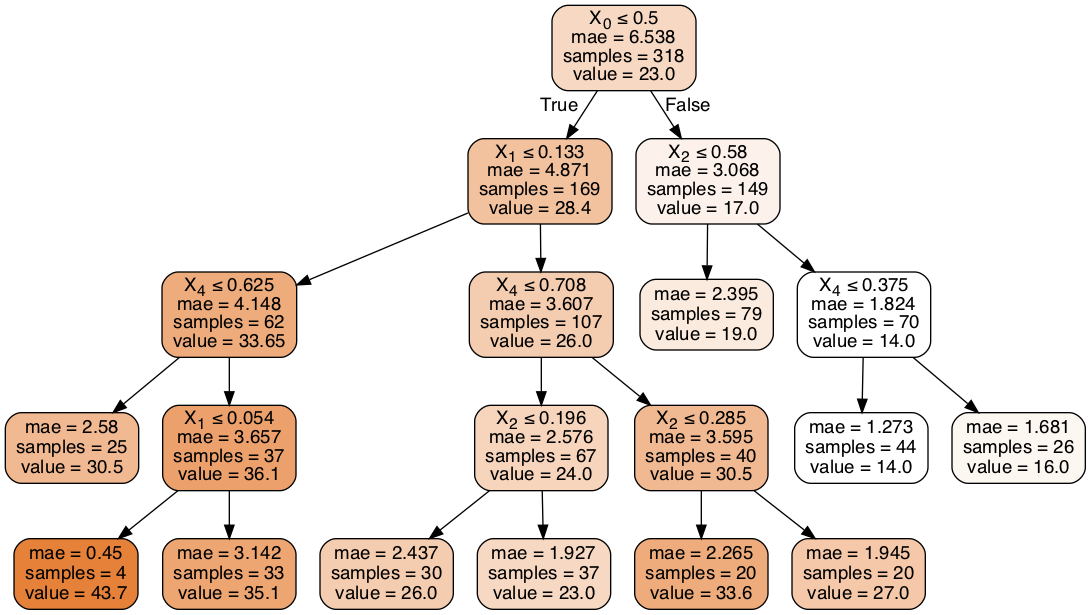

In [63]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# 3. Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
RandomForestRegressor()

RandomForestRegressor()

In [66]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid={"n_estimators":np.arange(1,60),"criterion":["mse","mae"],"max_depth":np.arange(2,10),"random_state":[1]},scoring="neg_mean_squared_error",cv=5)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [67]:
rf_grid.best_params_

{'criterion': 'mae', 'max_depth': 9, 'n_estimators': 35, 'random_state': 1}

In [68]:
rf = RandomForestRegressor(n_estimators=35,criterion="mae",max_depth=9,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=35,
                      random_state=0)

In [69]:
y_pred = rf.predict(x_test)

In [70]:
rf_test = r2_score(y_test,y_pred)  # test data
rf_test

0.8903367448511758

In [71]:
rf_train = r2_score(y_train,rf.predict(x_train))  # train data
rf_train

0.9745650584731822

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(target,rf.predict(ms_predictor))

2.503292754589274

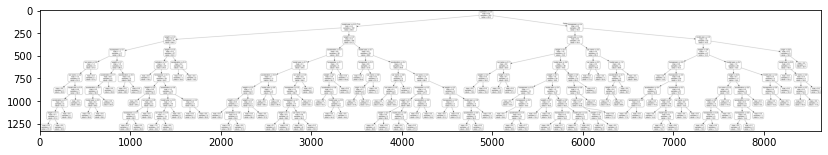

In [73]:
# sample tree from the forest
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as img
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = ["cylinders","horsepower","weight","acceleration","model year","origin","car name"], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
im = img.imread('tree.png')
plt.figure(figsize=(14,8))
plt.imshow(im)

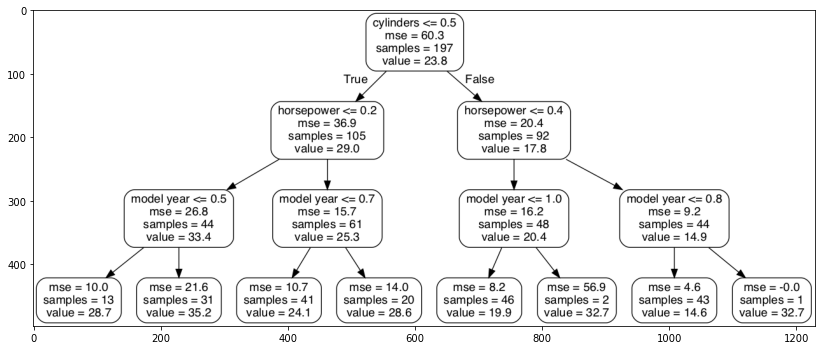

In [74]:
# reduced size tree
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ["cylinders","horsepower","weight","acceleration","model year","origin","car name"], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
im = img.imread('small_tree.png')
plt.figure(figsize=(14,8))
plt.imshow(im)

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


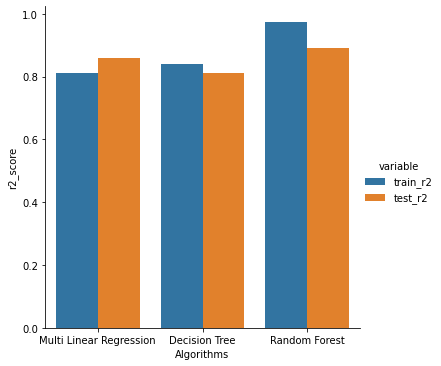

In [75]:
l_r2_test = [mlr_test,dt_test,rf_test]
l_r2_train = [mlr_train,dt_train,rf_train]
dfs = pd.DataFrame(data={"Algorithms":["Multi Linear Regression","Decision Tree","Random Forest"],"train_r2":l_r2_train,"test_r2":l_r2_test})
dfs1 = pd.melt(dfs,id_vars="Algorithms")
dfs1.columns = ['Algorithms', 'variable', 'r2_score']
sns.factorplot(x="Algorithms",y="r2_score",hue="variable",data=dfs1,kind="bar")

In the above bar graph we have plotted the r2_scores of each algorithm for the train and test data, from this we can intepret that random forest performed best for test data and also for train data as we used GridSearchCV to find optimal values for the hyper tuning parameters

# Final Model (Random Forest)

In [76]:
model = RandomForestRegressor(n_estimators=35,max_depth=9,criterion="mae",random_state=0)
model.fit(ms_predictor,target)

RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=35,
                      random_state=0)

In [77]:
model.score(ms_predictor,target)

0.9684161132217322

In [78]:
pred_t = model.predict(ms_predictor)

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(target,model.predict(ms_predictor))

1.9245994923597571

In [80]:
joblib.dump(model,'model.save')

['model.save']

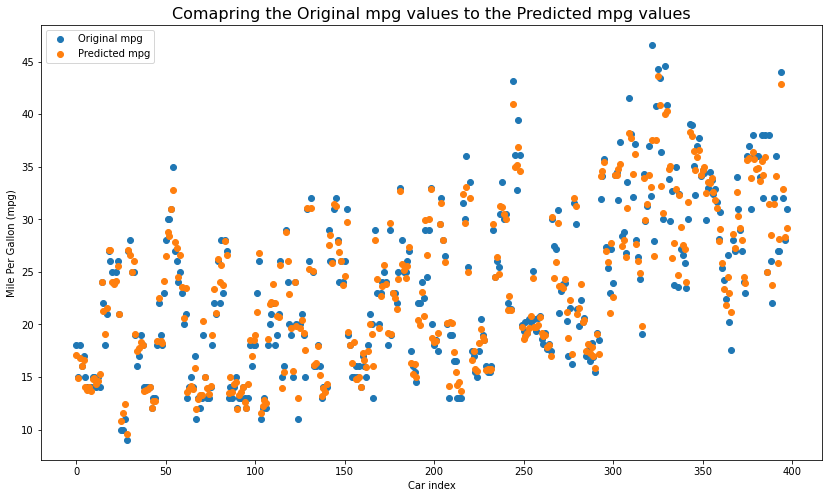

In [81]:
fea = pd.DataFrame(predictor)
df = pd.DataFrame({"Original mpg":target,"Predicted mpg":pred_t})
plt.figure(figsize=(14,8))
plt.scatter(df.index,df['Original mpg'].values,label='Original mpg')
plt.scatter(df.index,df['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Original mpg values to the Predicted mpg values',fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

As seen in the scatter plot the original values and predicted values for mpg are very close, therefore we can say that our random forest model made good predictions.